# Bin Packing Lab

- Authors:
  - Jung Woo Lee, lee331@mcmaster.ca
  - Nicholas Fabugais-Inaba, fabugain@mcmaster.ca
- Group ID on Avenue: 56
- Gitlab URL: https://gitlab.cas.mcmaster.ca/lee331/l2-bin-packing

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [2]:
from macpacking.reader import DatasetReader, BinppReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [3]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [7]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 35
[[14, 13, 13, 12, 8, 8], [20, 19, 18, 17, 15], [37, 30, 23], [39, 37], [43, 40], [44, 43], [50, 44], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [ ]:
# strategy: Online = online.NextFit()
# result = strategy(reader.online())
# print(f'nb_bins = {len(result)}')
# print(f'{sorted(result)}')

strategy: Online = online.FirstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 31
[[61, 13, 20], [62, 23, 15], [69, 8, 18], [83, 17], [97], [61, 37], [88, 8], [44, 43, 13], [72, 14, 12], [66, 30], [79, 19], [97], [83], [62, 37], [100], [70], [40, 44], [50, 43], [67], [63], [76], [97], [51, 39], [93], [93], [92], [76], [75], [71], [99], [92]]


In [5]:
strategy: Online = online.WorstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 33
[[61, 13], [62, 23], [69, 8], [83], [97], [61, 20], [88], [44, 43], [72], [66, 15], [79], [97], [83], [62, 37], [100], [70, 12], [40, 8, 18, 13], [44, 50], [67, 14], [63, 17], [37, 43], [76], [97], [51, 30], [93], [39, 19], [93], [92], [76], [75], [71], [99], [92]]


As expected, the online version is worst!

## T1

INCOMPLETE, ADD DATASET ANALYSIS

Single responsibility 
Definition: Each class, function, or object is only responsible for one specific task. 

Enforcement: 
The code follows single responsibility as certain groups of tasks are delegated to their own classes and functions. Taking for example, the task of loading data is put into the reader classes in reader.py. Another example is how the business logic (i.e. the algorithms) are put into their own classes. The online and offline algorithms are further separated as their tasks are slightly different due to the nature of their inputs, and thus each algorithm has their own respective classes. There is no “super-function” that can complete all tasks through the use of conditional, the code is separated such that each section can handle their subset of inputs. Overall, by delegating specific tasks to specific classes, instead of all the tasks into a few large classes, the code follows single responsibility.


Open closed
Definition: The Open Closed principles states that an app or program is open for extension but closed for modification. 

Enforcement: 
The code follows this principle as it utilizes abstraction, which allows for easy future implementations. Taking for example, model.py, its classes Online and Offline are both abstract and they have abstract methods called _process(). _process() is left to be implemented by other classes, for its particular type of problem (online or offline bin-packing). If another offline algorithm is wished to be implemented, there is no change of existing code needed, a new class that implements _process() from the abstract Offline class is sufficient. The same applies for the abstract Online class, and DatasetReader; these abstract classes can be implemented by new classes in the future if wanted. Thus, the existing code need not be changed to add new functionality, making it open for extension and closed for modification.

Liskov’s Substitution Principle:
Definition:
Every subclass or derived class should be substitutable for their base or parent class.

Enforcement:
The code follows this principle as each of the abstract classes can be substituted for their subclasses. In model.py, the abstract classes both are expecting an output of type Solution for both of their _process() methods. In any call of the abstract classes, they can be substituted with one of their concretions. For example, if somewhere an Online object was created and _process() called for that object, we would be able to replace this with a NextFit_On object and its _process() call. There would be no resulting errors that occur. This applies for the Offline abstract class and its concretions, and the DatasetReader class with its concretion. 

Interface Segregation Principle
Definition: Whenever you have an interface, you need everything that implements that interface to all methods/parts of that interface (i.e., everything tracks back to one interface). 

Enforcement:
The code follows this principle as none of the concrete classes are required to implement unnecessary functions of what they are implementing. The NextFit classes only implement _process() from their abstract classes, and that is all that they require. BinppReader only implements _load_data_from_disk(), but does not need to implement online() or offline(), which would have been unnecessary for it to implement. 

Design for Interface 
Definition: Entities must depend on abstractions, not on concretions. It states that the high-level module must not depend on the low-level module, but they should depend on abstractions.

Enforcement: All classes in the code depend only on abstract classes, and no abstract class depends on a concrete class within the code, thus this principle is satisfied by the code.

## T2

PLOT BENCHMARK AND ANALYSIS

## T3



Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
Optimal Solution: 31

Baseline
improvement_margin = 0

FirstFitDecreasing
improvement_margin = 0

BestFitDecreasing
improvement_margin = 0

WorstFitDecreasing
improvement_margin = 0

FirstFit
improvement_margin = 0

BestFit
improvement_margin = 0

WorstFit
improvement_margin = 2



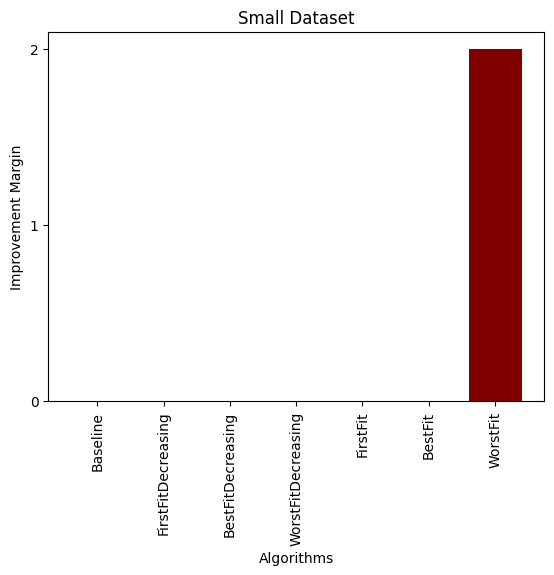

Dataset: _datasets/binpp/N2C2W2/N2C2W2_B.BPP.txt
Optimal Solution: 56

Baseline
improvement_margin = 0

FirstFitDecreasing
improvement_margin = 0

BestFitDecreasing
improvement_margin = 0

WorstFitDecreasing
improvement_margin = 0

FirstFit
improvement_margin = 3

BestFit
improvement_margin = 2

WorstFit
improvement_margin = 8



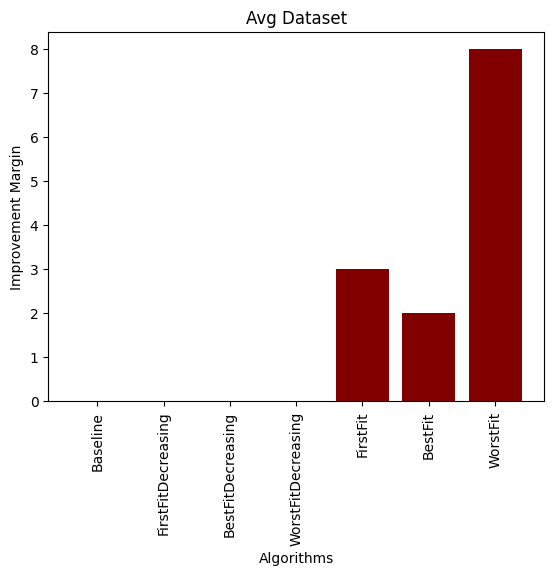

Dataset: _datasets/binpp/N4C3W4/N4C3W4_B.BPP.txt
Optimal Solution: 215

Baseline
improvement_margin = 4

FirstFitDecreasing
improvement_margin = 4

BestFitDecreasing
improvement_margin = 4

WorstFitDecreasing
improvement_margin = 4

FirstFit
improvement_margin = 17

BestFit
improvement_margin = 17

WorstFit
improvement_margin = 29



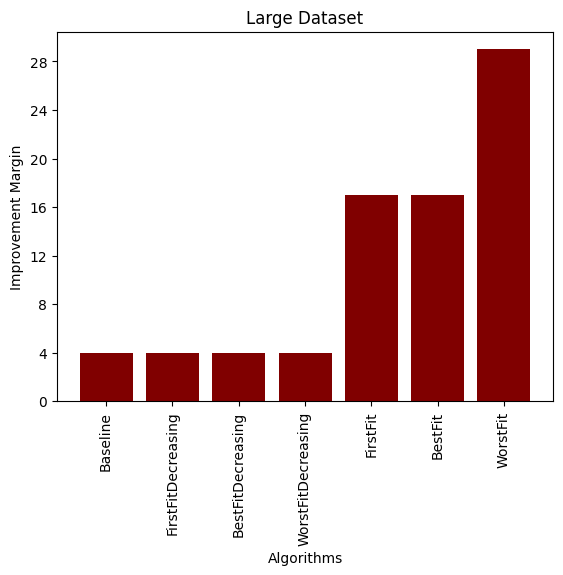

Dataset: _datasets/binpp-hard/HARD5.BPP.txt
Optimal Solution: 56

Baseline
improvement_margin = 3

FirstFitDecreasing
improvement_margin = 3

BestFitDecreasing
improvement_margin = 3

WorstFitDecreasing
improvement_margin = 3

FirstFit
improvement_margin = 6

BestFit
improvement_margin = 6

WorstFit
improvement_margin = 6



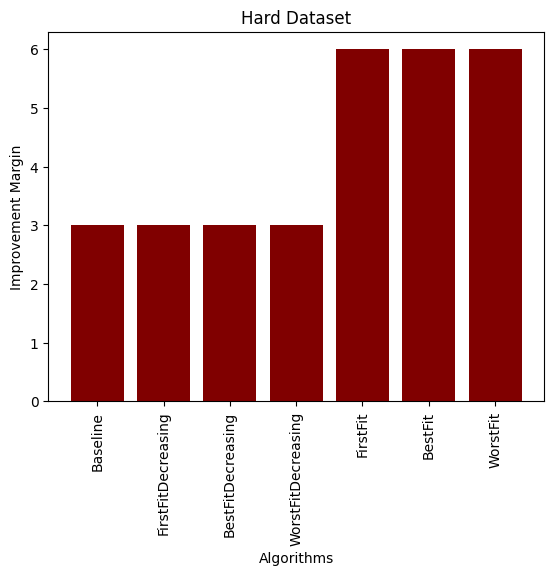

Dataset: _datasets/binpp/N4C1W4/N4C1W4_B.BPP.txt
Optimal Solution: 349

Baseline
improvement_margin = 0

FirstFitDecreasing
improvement_margin = 0

BestFitDecreasing
improvement_margin = 0

WorstFitDecreasing
improvement_margin = 0

FirstFit
improvement_margin = 11

BestFit
improvement_margin = 7

WorstFit
improvement_margin = 30



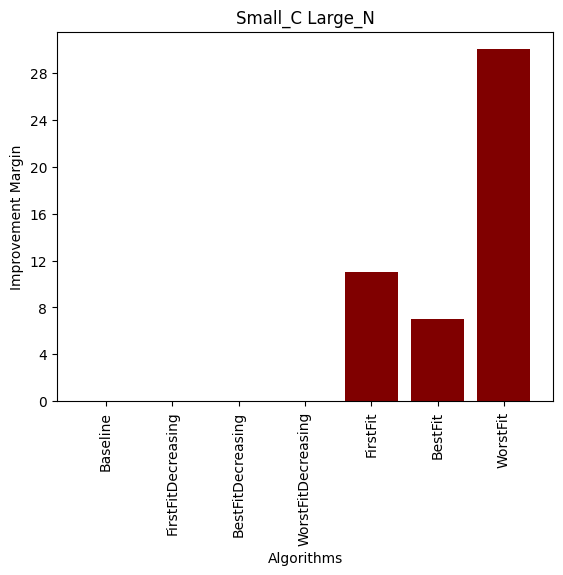

Dataset: _datasets/binpp/N1C3W1/N1C3W1_B.BPP.txt
Optimal Solution: 16

Baseline
improvement_margin = 0

FirstFitDecreasing
improvement_margin = 0

BestFitDecreasing
improvement_margin = 0

WorstFitDecreasing
improvement_margin = 0

FirstFit
improvement_margin = 1

BestFit
improvement_margin = 1

WorstFit
improvement_margin = 3



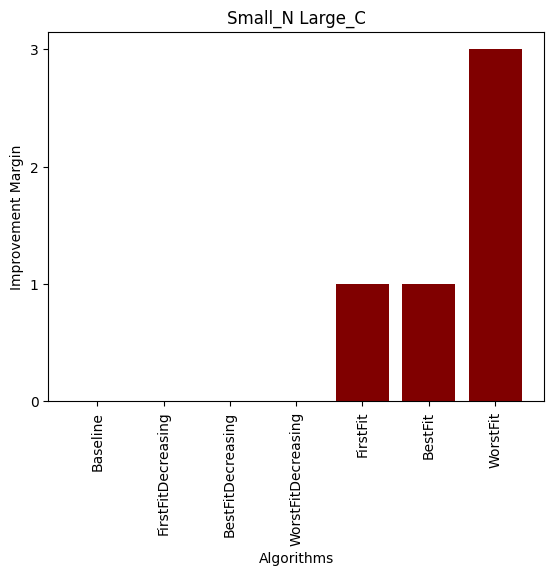

In [21]:
from macpacking.reader import DatasetReader, BinppReader, OracleReader
from macpacking.model  import Online, Offline
from matplotlib.ticker import MaxNLocator
import macpacking.algorithms.offline as offline
import macpacking.algorithms.online as online
import macpacking.algorithms.baseline as baseline
import matplotlib.pyplot as plt

# We consider:
#   - 50 objects (N1)
#   - bin capacity of 100 (C1)
#   - and weight in the [8,100] interval (W1)
dataset_small = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
# We consider:
#   - 100 objects (N2)
#   - bin capacity of 120 (C2)
#   - and weight in the [20,99] interval (W2)
dataset_avg = '_datasets/binpp/N2C2W2/N2C2W2_B.BPP.txt'
# We consider:
#   - 500 objects (N4)
#   - bin capacity of 150 (C3)
#   - and weight in the [30,100] interval (W4)
dataset_large = '_datasets/binpp/N4C3W4/N4C3W4_B.BPP.txt'
# We consider:
#   - 200 objects
#   - bin capacity of 100000
#   - and weight in the [20000,34955] interval
dataset_hard = '_datasets/binpp-hard/HARD5.BPP.txt'
# We consider:
#   - 500 objects (N4)
#   - bin capacity of 100 (C1)
#   - and weight in the [30,100] interval (W4)
dataset_smallC_largeN = '_datasets/binpp/N4C1W4/N4C1W4_B.BPP.txt'
# We consider:
#   - 50 objects (N1)
#   - bin capacity of 150 (C3)
#   - and weight in the [2,95] interval (W1)
dataset_smallN_largeC = '_datasets/binpp/N1C3W1/N1C3W1_B.BPP.txt'
oracle_dataset = '_datasets/oracle.csv'
cases = [dataset_small, dataset_avg, dataset_large, dataset_hard, dataset_smallC_largeN, dataset_smallN_largeC]
titles = ['Small Dataset', 'Avg Dataset', 'Large Dataset', 'Hard Dataset', 'Small_C Large_N', 'Small_N Large_C']
algorithms = []

for dataset in cases:

    optimal_solution = OracleReader(dataset)
    improvement_margin = []

    reader: DatasetReader = BinppReader(dataset)
    print(f'Dataset: {dataset}')
    print(f'Optimal Solution: {optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Offline = baseline.BenMaier()
    result = strategy(reader.offline())
    if 'Baseline' not in algorithms:
        algorithms.append('Baseline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('Baseline')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Offline = offline.FirstFitDecreasing()
    result = strategy(reader.offline())
    if 'FirstFitDecreasing' not in algorithms:
        algorithms.append('FirstFitDecreasing')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('FirstFitDecreasing')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Offline = offline.BestFitDecreasing()
    result = strategy(reader.offline())
    if 'BestFitDecreasing' not in algorithms:
        algorithms.append('BestFitDecreasing')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('BestFitDecreasing')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Offline = offline.WorstFitDecreasing()
    result = strategy(reader.offline())
    if 'WorstFitDecreasing' not in algorithms:
        algorithms.append('WorstFitDecreasing')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('WorstFitDecreasing')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Online = online.FirstFit()
    result = strategy(reader.online())
    if 'FirstFit' not in algorithms:
        algorithms.append('FirstFit')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('FirstFit')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Online = online.BestFit()
    result = strategy(reader.online())
    if 'BestFit' not in algorithms:
        algorithms.append('BestFit')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('BestFit')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Online = online.WorstFit()
    result = strategy(reader.online())
    if 'WorstFit' not in algorithms:
        algorithms.append('WorstFit')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))
    print('WorstFit')
    print(f'improvement_margin = {len(result) - optimal_solution._load_data(oracle_dataset)}\n')

    # X and Y Axis
    xAxis = [algo for algo in algorithms]
    yAxis = [val for val in improvement_margin]

    # Bar graph
    fig = plt.figure().gca()
    plt.bar(xAxis,yAxis, color='maroon')
    plt.xlabel('Algorithms')
    plt.ylabel('Improvement Margin')
    plt.xticks(rotation=90)
    plt.title(titles[cases.index(dataset)])
    fig.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()


## T4

PLOT RESULTS AND ANALYSIS

## T5

ANSWERS

## BONUS TASK

ANSWERS

## Self-reflection questions

Nicholas Fabugais-Inaba

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)

The process that I went through to produce this result was dissecting each of the problems into two parts: the implementation and the benchmarking, while splitting up the work for the analysis. By separating these two parts for each process, as a team we were able to have one person focus on the implementation aspect and one person focus on the benchmarking. This would allow things to run smoothly as each of us would become more comfortable in our designated field. Moreover, in between we would still support each other, if the other person needed assistance with what we were working on. This allowed us to accomplish a lot more work given the alotted time we had. With this I focused more on the implementation side of things, provided an extensive amount of research dedicated to determining each algorithms steps that were needed for its implementation. If I had any trouble, I would briefly discuss the problem with my teammate and see if he could figure out how one would go about doing it as I would then write the code. This process of going through things was very efficient as for future work, I will definitely try and split up the work in a way to where each part compliments each other.

  - What were your standards for this piece of work? Did you meet your standards? (Inward)

My standards for this piece of work was to make sure we would be able to get everything working as intended. Referring back to the previous lab, we had a lot of trouble in even meeting this standard, however, there was a lot more focus and drive to accomplishing the entire lab as one complete product. Although this seems to be a low standard, I believe that improvement is extremely crucial and to be able to hand in a complete product is not only fulfilling, but definitely satisfying as my teammate and I have put a lot of time and effort into accomplishing our piece of work. Next steps for future work would be to not only meet the given criteria as well as implement what has been asked for, but to also think of ways in which code can be even more optimized, follow SOLID design principles more extensively, and organize data and algorithms in a more readable and concise manner.

  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  
One thing I want people to particularly notice when they look at my work is the amount of time and effort that was given to accomplish the given task. Of course appreciation is shown towards outputting a product in a certain way, however, sometimes I feel as though not enough consideration is taken to really grasp the work students put in to what they do. Myself and I am assuming many others feel the same way as we may have put in an abundance of effort and time to completing a task in a certain way, however, at times, not a lot of information could have been provided, directions could have been vague or unclear, or not enough support could have been given to help understand certain parts of the problem. Individually I expect myself to improve, however, I hope as time moves forward that the people taking a look at my work are constantly trying to find ways to improve how they view work and how they can provide more clear comments pertaining to errors in the work or ways to improve the work that has been delivered, so I can learn from my mistakes to do better in the future.

  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

Lessons I will keep from this in my professional practice are to always abide by the SOLID design principles. This is not only useful in constructing code in a way that is readable and maintainable, however, it helps to make future code more extendable as an efficient base code can be extremely helpful when it is required for an additional method to be introduced. Another lesson would be the separation of concerns regarding a workload and how work should be grouped into categories that can then be solved in these specified portions. This would be very useful in professional practice as one might be given a very large task that they would not know where to even begin. However, by separating the workload into specific portions that correspond to each other, an individual may find it a lot more easy to understand how the problem would be solved.

Jung Woo Lee

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)

ANSWER

  - What were your standards for this piece of work? Did you meet your standards? (Inward)

ANSWER

  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  
ANSWER

  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

ANSWER